In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#importing data
train_df =  pd.read_csv('Train.csv')
train_df.sample(5)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
3488,tour_5224,ITALY,25-44,NaN,0.0,1.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Package Tour,...,Yes,No,Yes,Yes,0.0,7.0,Cash,Yes,Excellent Experience,2950129.0
2350,tour_3860,ITALY,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,No,No,No,Yes,0.0,7.0,Cash,Yes,Excellent Experience,15658377.0
3314,tour_501,UNITED KINGDOM,65+,Spouse,1.0,1.0,Visiting Friends and Relatives,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,4.0,0.0,Cash,No,No comments,497250.0
273,tour_134,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,3.0,0.0,Cash,Yes,Wildlife,2154750.0
4034,tour_5894,UNITED STATES OF AMERICA,25-44,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Independent,...,No,No,No,No,6.0,7.0,Cash,Yes,Good service,12182625.0


In [3]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [4]:
train_df.shape

(4809, 23)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [6]:
train_df['travel_with'].fillna('unknown', inplace=True)
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,unknown,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,unknown,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [9]:
#dropping duplicates rows
duplicate_rows = train_df[train_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows)

Number of duplicated rows:  Empty DataFrame
Columns: [ID, country, age_group, travel_with, total_female, total_male, purpose, main_activity, info_source, tour_arrangement, package_transport_int, package_accomodation, package_food, package_transport_tz, package_sightseeing, package_guided_tour, package_insurance, night_mainland, night_zanzibar, payment_mode, first_trip_tz, most_impressing, total_cost]
Index: []

[0 rows x 23 columns]


In [11]:
train_df1 = train_df.drop_duplicates()
train_df1.shape

(4809, 23)

From above we can see we did have any duplicates values in our dataset

In [14]:
countries = train_df['country'].value_counts()
countries

UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
URUGUAY                       1
SLOVENIA                      1
CAPE VERDE                    1
COMORO                        1
MORROCO                       1
Name: country, Length: 105, dtype: int64

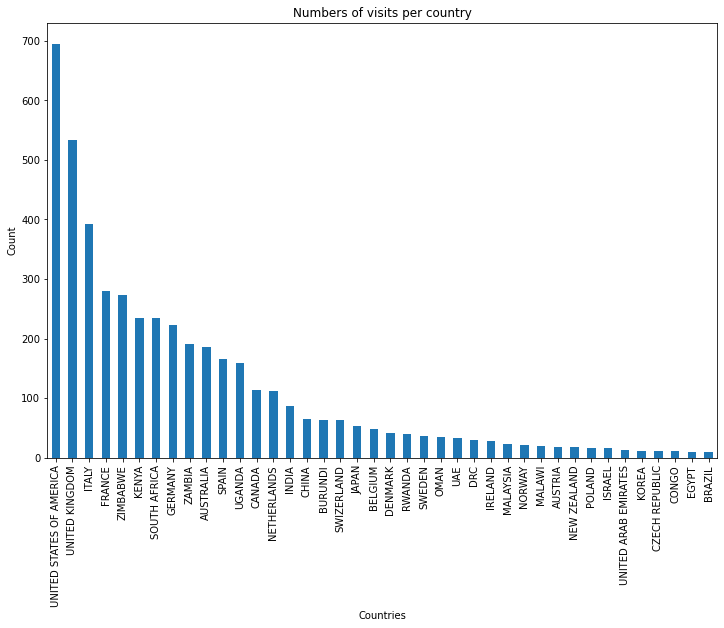

In [15]:
#Lets visualize the above data using a histogram
#plotting a histogram
countries.nlargest(40).plot(kind = "bar", figsize = (12,8))
plt.title("Numbers of visits per country")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.show()

From the above info we can see that Tanzania received more tourists from United States Of America followed by United Kindgom.
- Some else interesting, country like Kenya and Zimbabwe are among the top 10 countries from where tourists can from.
- We can try and see their purpose and their main activity in TAnzania after arriving.